In [1]:
import os
import math
import requests
import numpy as np
import src.credentials as cred
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from src.questrade import QuestradeBot

# Personal Inputs

In [2]:
ACCOUNT_NUM = cred.QUESTRADE_ACCOUNT_NUM
QUESTRADE_TOKEN = cred.QUESTRADE_API_CODE

# QuestradeBot Initialization

In [3]:
qbot = QuestradeBot(QUESTRADE_TOKEN, ACCOUNT_NUM)

# Account Balance

In [4]:
balance = qbot.get_balance()
balance

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,31785.3365,0.00,31785.3365,100.0,0.0
USD,21744.9715,10282.36,32027.3315,67.9,32.1


# Portfolio Holdings

In [5]:
portfolio = qbot.get_investment_summary()
portfolio

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)
MMM,3M COMPANY,USD,3,535.29,-9.37,5.21
O,REALTY INCOME CORP,USD,75,5064.00,10.33,49.25
JPM,JPMORGAN CHASE & CO.,USD,6,921.06,0.03,8.96
VTI,VANGUARD INDEX FUNDS VANGUARD TOTAL STOCK MARK...,USD,3,676.44,15.23,6.58
QQQ,INVESCO QQQ TRUST UNIT SER 1,USD,2,733.02,14.65,7.13
GLD,SPDR GOLD TRUST GOLD SHARES NPV,USD,7,1162.70,-4.70,11.31
TLT,ISHARES TRUST BARCLAYS 20+ TREAS BD FD TO 07/0...,USD,4,602.84,-0.63,5.86
IEF,ISHARES TRUST BARCLAYS 7-10 YEAR TREASURY BOND...,USD,5,584.90,-1.40,5.69


In [6]:
portfolio_return = (portfolio['Return (%)'].dot(portfolio['Portfolio (%)'])) / 100
portfolio_return

6.000567

<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

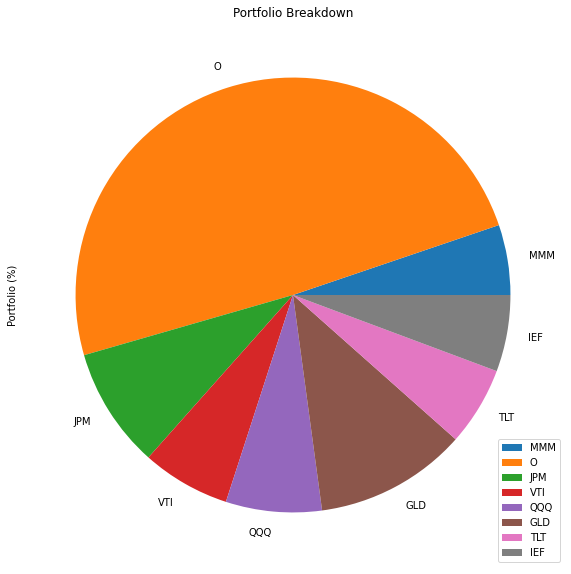

In [7]:
portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

# Monthly Dividend Income

In [8]:
div = qbot.get_dividend_income()
div.loc['Total'] = div.sum(numeric_only=True, axis=0)

<AxesSubplot:title={'center':'Monthly Dividend Payments'}, xlabel='Months', ylabel='Dividend ($)'>

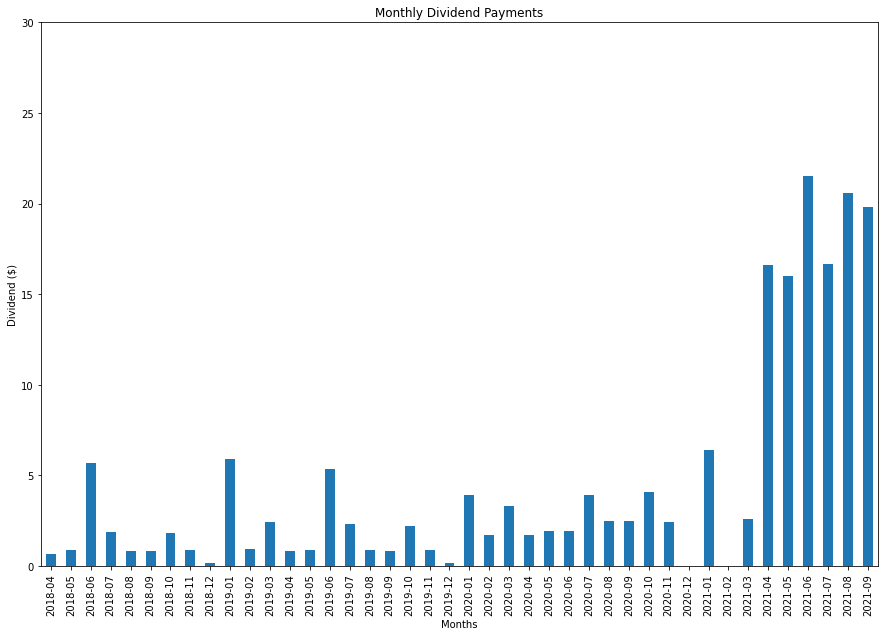

In [9]:
div[:-1].plot(kind='bar',
                    title='Monthly Dividend Payments',
                    xlabel='Months',
                    ylabel='Dividend ($)',
                    figsize=(15, 10),
                    legend=False,
                    ylim=(0, 30))

# Performance Against Benchmark